In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)


In [3]:
DATA_DIR = "C:/Users/ishan/OneDrive/Desktop/DS5500 Project/Prediction-Model-for-Adverse-Drug-Reactions-Using-Deep-Learning-Methods/data/hosp"


## Load Core Tables (Sampled)

In [4]:
patients = pd.read_csv(f"{DATA_DIR}/patients.csv.gz")
prescriptions = pd.read_csv(
    f"{DATA_DIR}/prescriptions.csv.gz",
    nrows=200_000
)
diagnoses = pd.read_csv(
    f"{DATA_DIR}/diagnoses_icd.csv.gz",
    nrows=200_000
)

print("Patients:", patients.shape)
print("Prescriptions (sample):", prescriptions.shape)
print("Diagnoses (sample):", diagnoses.shape)


Patients: (299712, 6)
Prescriptions (sample): (200000, 21)
Diagnoses (sample): (200000, 5)


C:\Users\ishan\AppData\Local\Temp\ipykernel_13044\2322416862.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  prescriptions = pd.read_csv(


## Inspect Tables

In [17]:
print("Patients:")
display(patients.head())

print("Prescriptions:")
display(prescriptions.head())

print("Diagnoses:")
display(diagnoses.head())


Patients:


,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2161-02-13
4,10000102,F,27,2136,2008 - 2010,NaN


Prescriptions:


,subject_id,hadm_id,pharmacy_id,poe_id,poe_seq,order_provider_id,starttime,stoptime,drug_type,drug,formulary_drug_cd,gsn,ndc,prod_strength,form_rx,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,doses_per_24_hrs,route
0,10000032,22595853,11700683,10000032-34,34.0,P76JEQ,2180-05-07 01:00:00,2180-05-07 22:00:00,MAIN,Acetaminophen,APAP500,004490,9.041989e+08,500mg Tablet,NaN,500,mg,1,TAB,NaN,PO/NG
1,10000032,22595853,14779570,10000032-22,22.0,P76JEQ,2180-05-07 00:00:00,2180-05-07 22:00:00,MAIN,Sodium Chloride 0.9% Flush,NACLFLUSH,NaN,0.000000e+00,10 mL Syringe,NaN,3,mL,0.3,SYR,3.0,IV
2,10000032,22595853,19796602,10000032-50,50.0,P260SK,2180-05-08 08:00:00,2180-05-07 22:00:00,MAIN,Furosemide,FURO40,008209,5.107901e+10,40mg Tablet,NaN,40,mg,1,TAB,1.0,PO/NG
3,10000032,22595853,20256254,10000032-32,32.0,P76JEQ,2180-05-07 01:00:00,2180-05-07 22:00:00,MAIN,Raltegravir,RALT400,063231,6.022761e+06,400 mg Tablet,NaN,400,mg,1,TAB,2.0,PO
4,10000032,22595853,28781051,10000032-27,27.0,P76JEQ,2180-05-07 00:00:00,2180-05-07 22:00:00,MAIN,Heparin,HEPA5I,006549,6.332303e+10,5000 Units / mL- 1mL Vial,NaN,5000,UNIT,1,mL,3.0,SC


Diagnoses:


,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10000032,22595853,1,5723,9
1,10000032,22595853,2,78959,9
2,10000032,22595853,3,5715,9
3,10000032,22595853,4,07070,9
4,10000032,22595853,5,496,9


## Basic Patient Demographics

In [8]:
patients["gender"].value_counts()


gender
F    158553
M    141159
Name: count, dtype: int64

In [9]:
patients["anchor_age"].describe()


count    299712.000000
mean         48.539888
std          20.895650
min          18.000000
25%          29.000000
50%          48.000000
75%          65.000000
max          91.000000
Name: anchor_age, dtype: float64

## Most Common Prescribed Drugs

In [11]:
top_drugs = (
    prescriptions["drug"]
    .value_counts()
    .head(10)
)

top_drugs


drug
Insulin                        8929
0.9% Sodium Chloride           7323
Sodium Chloride 0.9%  Flush    6676
Potassium Chloride             6136
Acetaminophen                  5803
Furosemide                     4224
Heparin                        4008
5% Dextrose                    3945
Docusate Sodium                3673
Magnesium Sulfate              3633
Name: count, dtype: int64

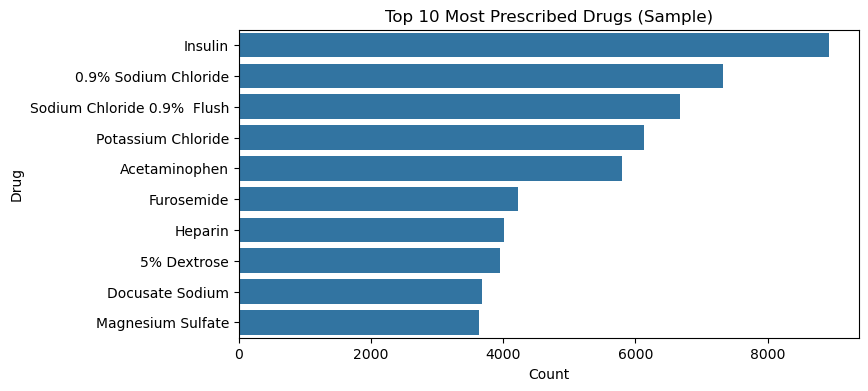

In [12]:
plt.figure(figsize=(8,4))
sns.barplot(x=top_drugs.values, y=top_drugs.index)
plt.title("Top 10 Most Prescribed Drugs (Sample)")
plt.xlabel("Count")
plt.ylabel("Drug")
plt.show()


## ICD-9 vs ICD-10 Distribution

In [14]:
diagnoses["icd_version"].value_counts()


icd_version
9     113964
10     86036
Name: count, dtype: int64

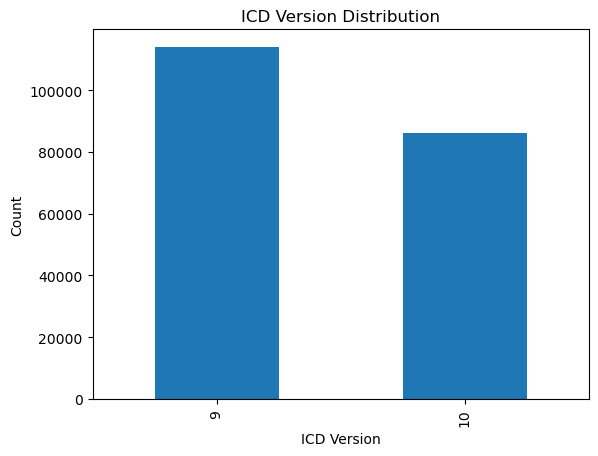

In [15]:
diagnoses["icd_version"].value_counts().plot(
    kind="bar",
    title="ICD Version Distribution"
)
plt.xlabel("ICD Version")
plt.ylabel("Count")
plt.show()
